# Random Forest Model

RF model to be used for predicting protein coding genes in DNA sequences.

**Random Search with CV**
- bootstrap': False
- max_depth': 20
- max_features': 'auto'
- min_samples_leaf': 1
- min_samples_split': 2
- n_estimators': 1000
 
**Grid Search with CV**
- bootstrap': False
- max_depth': 40
- max_features': 3
- min_samples_leaf': 1
- min_samples_split': 2
- n_estimators': 2000

BEST MODEL:
- Random Search with CV - BUT
- n_estimators': 200
- n_features: 200

## Imports

In [ ]:
G3 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G3.features.csv').iloc[: , 1:]
G4 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G4.features.csv')
G5 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G5.features.csv')
G6 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G6.features.csv')
G7 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G7.features.csv')
G8 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G8.features.csv')
G9 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G9.features.csv')
G10 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G10.features.csv')
G11 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G11.features.csv')
G12 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G12.features.csv')
G13 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G13.features.csv')
G14 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G14.features.csv')
G15 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G15.features.csv')

In [ ]:
G2 = G2.iloc[: , 1:]
G3 = G3.iloc[: , 1:]
G4 = G4.iloc[: , 1:]
G5 = G5.iloc[: , 1:]
G6 = G6.iloc[: , 1:]
G7 = G7.iloc[: , 1:]
G8 = G8.iloc[: , 1:]
G9 = G9.iloc[: , 1:]
G10 = G10.iloc[: , 1:]
G11 = G11.iloc[: , 1:]
G12 = G12.iloc[: , 1:]
G13 = G13.iloc[: , 1:]
G14 = G14.iloc[: , 1:]
G15 = G15.iloc[: , 1:]

In [ ]:
frames = [G1, G2, G3, G4, G5, G6, G7, G8, G9, G10, G11, G12, G13, G14, G15]

df = pd.concat(frames)
df = df.iloc[: , 1:]

In [ ]:
df.tail(10)

In [ ]:
G1 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G1.features.csv')

In [2]:
# Importing data
import pandas as pd
import time

# Preprocessing and encoding variables
import numpy as np
from sklearn import preprocessing

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Visualising feature importance and making plots
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
import pydot

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Confusion matrix
from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score, roc_auc_score

In [3]:
G2 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G2.features.csv')

## Ett genom av gangen

In [4]:
G = G2.iloc[: , 1:]

In [5]:
G.tail(5)

,Type,Length,Dataset,Genome,GC_content,GC1_content,GC2_content,GC3_content,Start_ATG,Start_GTG,...,c_weight_TCG,c_weight_TCT,c_weight_TGA,c_weight_TGC,c_weight_TGG,c_weight_TGT,c_weight_TTA,c_weight_TTC,c_weight_TTG,c_weight_TTT
11141,CDS,10608,1,Staphylococcus aureus,0.685709,0.691459,0.487274,0.878394,1,0,...,0.101045,0.010453,1,1.000000,1,0.000000,0.002304,0.946429,0.055300,0.053571
11142,CDS,12543,1,Staphylococcus aureus,0.676234,0.690744,0.521167,0.816790,1,0,...,0.195335,0.014577,0,0.500000,1,0.500000,0.006522,0.903226,0.156522,0.096774
11143,CDS,13029,1,Staphylococcus aureus,0.703201,0.750633,0.449229,0.909740,1,0,...,0.192118,0.000000,1,0.980392,1,0.019608,0.001684,0.979730,0.065657,0.020270
11144,CDS,15450,1,Staphylococcus aureus,0.675081,0.737087,0.444854,0.843301,1,0,...,0.211382,0.012195,1,0.904762,1,0.095238,0.001406,0.955414,0.139240,0.044586
11145,CDS,16884,1,Staphylococcus aureus,0.650853,0.671997,0.486851,0.793710,1,0,...,0.092338,0.027505,0,0.714286,1,0.285714,0.005642,0.875000,0.100141,0.125000


In [6]:
G = G.dropna()

In [7]:
print('The shape of our dataframe is:', G.shape)

The shape of our dataframe is: (11146, 14791)


## Pre-processing / Data preparation

1. One-hot encoded categorical variables
2. Split data into features and labels
3. Convert to arrays
4. Split data into training and testing sets

### Encoding target values

In [8]:
def encode_feature(array):
    """ Encode a categorical array into a number array
    
    :param array: array to be encoded
    :return: numerical array
    """
  
    encoder = preprocessing.LabelEncoder()
    encoder.fit(array)
    return encoder.transform(array)

In [9]:
class_names = ['CDS', 'LORF']
targets = G["Type"].values
print(targets)

['CDS' 'CDS' 'LORF' ... 'CDS' 'CDS' 'CDS']


In [10]:
targets = encode_feature(targets)
print(targets)

[0 0 1 ... 0 0 0]


In [11]:
print('The shape of our dataframe is:', G.shape)
print('Rows:', G.shape[0])
print('Columns:', G.shape[1])

The shape of our dataframe is: (11146, 14791)
Rows: 11146
Columns: 14791


### Selecting features and targets and converting data to arrays

In [12]:
# Labels are the values we want to predict
labels = targets

# Remove the labels from the features -> axis 1 refers to the columns
features = G.drop(['Type','Genome', 'Dataset'], axis = 1)

# Saving feature names as list for later use
feature_names = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [13]:
print('The shape of our features are:', features.shape)

The shape of our features are: (11146, 14788)


### Split into training and testing sets

In [14]:
# Split the data into training and testing sets -> x = features and y = labels/targets
train_x, test_x, train_y, test_y = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [15]:
print('Training Features Shape:', train_x.shape)
print('Training Labels Shape:', train_y.shape)
print('Testing Features Shape:', test_x.shape)
print('Testing Labels Shape:', test_y.shape)

Training Features Shape: (8359, 14788)
Training Labels Shape: (8359,)
Testing Features Shape: (2787, 14788)
Testing Labels Shape: (2787,)


## Train model - best params RandomSearch

**RandomForestClassifier**(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [17]:
# Create a Gaussian Classifier
clf_rand = RandomForestClassifier(n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features='auto', 
                             max_depth=20, bootstrap=False, random_state = 42)

# Train the model using the training sets y_pred=clf.predict(X_test)
clf_rand.fit(train_x, train_y)

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=200,
                       random_state=42)

## Make predictions on test set

In [18]:
pred_y = clf_rand.predict(test_x)

# Model Accuracy, how often is the classifier correct?
print("Accuracy score:", metrics.accuracy_score(test_y, pred_y))
# Precision, Recall and Roc_AUC score
print("Precision score:", metrics.precision_score(test_y, pred_y))
print("Recall score:", metrics.recall_score(test_y, pred_y))
print("ROC_AUC score:", metrics.roc_auc_score(test_y, pred_y))

Accuracy score: 0.9949766774309293
Precision score: 0.9929228591648974
Recall score: 0.9971570717839374
ROC_AUC score: 0.9949553474861716


## Confusion matrix

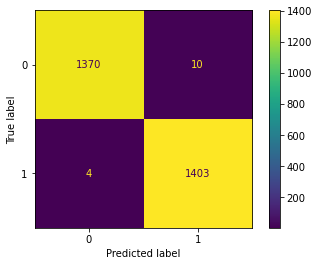

<Figure size 432x288 with 0 Axes>

In [54]:
plot_confusion_matrix(clf_rand, test_x, test_y)  
plt.show()

#plt.savefig('confmatrix_g2.png', dpi=300, bbox_inches='tight', transparent=True)

## Finding important features

1. Create a random forests model.
2. Use the feature importance variable to see feature importance scores.
3. Visualize these scores using the seaborn library.

In [21]:
# Get numerical feature importances
importances = list(clf_rand.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(feature_names, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: c_weight_ACC         Importance: 0.0169
Variable: c_weight_GCC         Importance: 0.01664
Variable: c_weight_GGC         Importance: 0.01648
Variable: c_weight_CGC         Importance: 0.01578
Variable: c_weight_GAC         Importance: 0.01572
Variable: GC2_content          Importance: 0.01387
Variable: c_weight_GTG         Importance: 0.01375
Variable: c_weight_GAT         Importance: 0.01373
Variable: 1_aa_mer_K           Importance: 0.01227
Variable: c_weight_GCT         Importance: 0.01188
Variable: GC1_content          Importance: 0.01168
Variable: 1_aa_mer_R           Importance: 0.01103
Variable: c_weight_CTG         Importance: 0.01086
Variable: 2_aa_mer_RR          Importance: 0.01052
Variable: Start_ATG            Importance: 0.01043
Variable: GC3_content          Importance: 0.0103
Variable: 1_aa_mer_Y           Importance: 0.01017
Variable: c_weight_CCA         Importance: 0.01017
Variable: c_weight_AGC         Importance: 0.00912
Variable: 1_aa_mer_I           Im

Variable: 4_mer_AAGC           Importance: 8e-05
Variable: 4_mer_AAGT           Importance: 8e-05
Variable: 4_mer_ACCG           Importance: 8e-05
Variable: 4_mer_AGTG           Importance: 8e-05
Variable: 4_mer_ATTG           Importance: 8e-05
Variable: 4_mer_CCGG           Importance: 8e-05
Variable: 4_mer_CGCT           Importance: 8e-05
Variable: 4_mer_GATC           Importance: 8e-05
Variable: 4_mer_GCGA           Importance: 8e-05
Variable: 4_mer_GGCC           Importance: 8e-05
Variable: 4_mer_TGAA           Importance: 8e-05
Variable: 4_mer_TGGT           Importance: 8e-05
Variable: 4_mer_TTAC           Importance: 8e-05
Variable: 4_mer_TTTG           Importance: 8e-05
Variable: 5_mer_AACGA          Importance: 8e-05
Variable: 5_mer_AAGAC          Importance: 8e-05
Variable: 5_mer_AAGAG          Importance: 8e-05
Variable: 5_mer_ACCAC          Importance: 8e-05
Variable: 5_mer_AGATC          Importance: 8e-05
Variable: 5_mer_AGGTC          Importance: 8e-05
Variable: 5_mer_ATCC

Variable: 2_aa_mer_VR          Importance: 5e-05
Variable: 2_aa_mer_VW          Importance: 5e-05
Variable: 2_aa_mer_WA          Importance: 5e-05
Variable: 2_aa_mer_WS          Importance: 5e-05
Variable: 3_aa_mer_AAS         Importance: 5e-05
Variable: 3_aa_mer_ADH         Importance: 5e-05
Variable: 3_aa_mer_AQP         Importance: 5e-05
Variable: 3_aa_mer_AST         Importance: 5e-05
Variable: 3_aa_mer_CSA         Importance: 5e-05
Variable: 3_aa_mer_DYL         Importance: 5e-05
Variable: 3_aa_mer_EEL         Importance: 5e-05
Variable: 3_aa_mer_ELK         Importance: 5e-05
Variable: 3_aa_mer_GAA         Importance: 5e-05
Variable: 3_aa_mer_GAD         Importance: 5e-05
Variable: 3_aa_mer_GAR         Importance: 5e-05
Variable: 3_aa_mer_GDQ         Importance: 5e-05
Variable: 3_aa_mer_GDV         Importance: 5e-05
Variable: 3_aa_mer_GRA         Importance: 5e-05
Variable: 3_aa_mer_GRS         Importance: 5e-05
Variable: 3_aa_mer_HRQ         Importance: 5e-05
Variable: 3_aa_mer_K

Variable: 5_mer_GGGGA          Importance: 3e-05
Variable: 5_mer_GGGTT          Importance: 3e-05
Variable: 5_mer_GGTGT          Importance: 3e-05
Variable: 5_mer_GGTTT          Importance: 3e-05
Variable: 5_mer_GTACC          Importance: 3e-05
Variable: 5_mer_GTACG          Importance: 3e-05
Variable: 5_mer_GTATC          Importance: 3e-05
Variable: 5_mer_GTCAC          Importance: 3e-05
Variable: 5_mer_GTCAT          Importance: 3e-05
Variable: 5_mer_GTCCG          Importance: 3e-05
Variable: 5_mer_GTCCT          Importance: 3e-05
Variable: 5_mer_GTCGA          Importance: 3e-05
Variable: 5_mer_GTCTA          Importance: 3e-05
Variable: 5_mer_GTCTG          Importance: 3e-05
Variable: 5_mer_GTGAC          Importance: 3e-05
Variable: 5_mer_GTGCA          Importance: 3e-05
Variable: 5_mer_GTGGA          Importance: 3e-05
Variable: 5_mer_GTGGC          Importance: 3e-05
Variable: 5_mer_TACGC          Importance: 3e-05
Variable: 5_mer_TAGCC          Importance: 3e-05
Variable: 5_mer_TATC

Variable: 4_mer_CTTA           Importance: 2e-05
Variable: 4_mer_GCAT           Importance: 2e-05
Variable: 4_mer_GTGT           Importance: 2e-05
Variable: 4_mer_TAAC           Importance: 2e-05
Variable: 4_mer_TAAG           Importance: 2e-05
Variable: 4_mer_TAAT           Importance: 2e-05
Variable: 4_mer_TCAC           Importance: 2e-05
Variable: 4_mer_TGTA           Importance: 2e-05
Variable: 4_mer_TTAG           Importance: 2e-05
Variable: 4_mer_TTAT           Importance: 2e-05
Variable: 5_mer_AAAAT          Importance: 2e-05
Variable: 5_mer_AAACG          Importance: 2e-05
Variable: 5_mer_AAAGG          Importance: 2e-05
Variable: 5_mer_AATAG          Importance: 2e-05
Variable: 5_mer_AATGA          Importance: 2e-05
Variable: 5_mer_AATGC          Importance: 2e-05
Variable: 5_mer_ACACG          Importance: 2e-05
Variable: 5_mer_ACCAA          Importance: 2e-05
Variable: 5_mer_ACCAT          Importance: 2e-05
Variable: 5_mer_ACCCA          Importance: 2e-05
Variable: 5_mer_ACCG

Variable: 6_mer_GAACGC         Importance: 2e-05
Variable: 6_mer_GAACGG         Importance: 2e-05
Variable: 6_mer_GAACTC         Importance: 2e-05
Variable: 6_mer_GAAGAA         Importance: 2e-05
Variable: 6_mer_GAAGCA         Importance: 2e-05
Variable: 6_mer_GAAGGA         Importance: 2e-05
Variable: 6_mer_GAAGGC         Importance: 2e-05
Variable: 6_mer_GAAGGG         Importance: 2e-05
Variable: 6_mer_GAAGTG         Importance: 2e-05
Variable: 6_mer_GAATCA         Importance: 2e-05
Variable: 6_mer_GAATCC         Importance: 2e-05
Variable: 6_mer_GAATGG         Importance: 2e-05
Variable: 6_mer_GACAGG         Importance: 2e-05
Variable: 6_mer_GACCAA         Importance: 2e-05
Variable: 6_mer_GACCCC         Importance: 2e-05
Variable: 6_mer_GACCGT         Importance: 2e-05
Variable: 6_mer_GACCTC         Importance: 2e-05
Variable: 6_mer_GACCTT         Importance: 2e-05
Variable: 6_mer_GACGAA         Importance: 2e-05
Variable: 6_mer_GACGCG         Importance: 2e-05
Variable: 6_mer_GACG

Variable: 3_aa_mer_ILA         Importance: 2e-05
Variable: 3_aa_mer_ILE         Importance: 2e-05
Variable: 3_aa_mer_ILV         Importance: 2e-05
Variable: 3_aa_mer_IVN         Importance: 2e-05
Variable: 3_aa_mer_KAV         Importance: 2e-05
Variable: 3_aa_mer_KGK         Importance: 2e-05
Variable: 3_aa_mer_KLD         Importance: 2e-05
Variable: 3_aa_mer_KLN         Importance: 2e-05
Variable: 3_aa_mer_KVL         Importance: 2e-05
Variable: 3_aa_mer_KVV         Importance: 2e-05
Variable: 3_aa_mer_LAF         Importance: 2e-05
Variable: 3_aa_mer_LAG         Importance: 2e-05
Variable: 3_aa_mer_LAN         Importance: 2e-05
Variable: 3_aa_mer_LAT         Importance: 2e-05
Variable: 3_aa_mer_LDH         Importance: 2e-05
Variable: 3_aa_mer_LDT         Importance: 2e-05
Variable: 3_aa_mer_LEG         Importance: 2e-05
Variable: 3_aa_mer_LEQ         Importance: 2e-05
Variable: 3_aa_mer_LFD         Importance: 2e-05
Variable: 3_aa_mer_LFL         Importance: 2e-05
Variable: 3_aa_mer_L

Variable: 6_mer_ACATCG         Importance: 1e-05
Variable: 6_mer_ACATGA         Importance: 1e-05
Variable: 6_mer_ACATGT         Importance: 1e-05
Variable: 6_mer_ACATTG         Importance: 1e-05
Variable: 6_mer_ACCAAA         Importance: 1e-05
Variable: 6_mer_ACCAAG         Importance: 1e-05
Variable: 6_mer_ACCACA         Importance: 1e-05
Variable: 6_mer_ACCACC         Importance: 1e-05
Variable: 6_mer_ACCACT         Importance: 1e-05
Variable: 6_mer_ACCCAC         Importance: 1e-05
Variable: 6_mer_ACCCAG         Importance: 1e-05
Variable: 6_mer_ACCCAT         Importance: 1e-05
Variable: 6_mer_ACCCCA         Importance: 1e-05
Variable: 6_mer_ACCCCC         Importance: 1e-05
Variable: 6_mer_ACCCCT         Importance: 1e-05
Variable: 6_mer_ACCCGC         Importance: 1e-05
Variable: 6_mer_ACCCGT         Importance: 1e-05
Variable: 6_mer_ACCCTC         Importance: 1e-05
Variable: 6_mer_ACCCTT         Importance: 1e-05
Variable: 6_mer_ACCGAA         Importance: 1e-05
Variable: 6_mer_ACCG

Variable: 6_mer_CGATAA         Importance: 1e-05
Variable: 6_mer_CGATAC         Importance: 1e-05
Variable: 6_mer_CGATAT         Importance: 1e-05
Variable: 6_mer_CGATCT         Importance: 1e-05
Variable: 6_mer_CGATTG         Importance: 1e-05
Variable: 6_mer_CGATTT         Importance: 1e-05
Variable: 6_mer_CGCAAA         Importance: 1e-05
Variable: 6_mer_CGCAAC         Importance: 1e-05
Variable: 6_mer_CGCAAT         Importance: 1e-05
Variable: 6_mer_CGCACA         Importance: 1e-05
Variable: 6_mer_CGCACT         Importance: 1e-05
Variable: 6_mer_CGCAGA         Importance: 1e-05
Variable: 6_mer_CGCAGT         Importance: 1e-05
Variable: 6_mer_CGCATT         Importance: 1e-05
Variable: 6_mer_CGCGTG         Importance: 1e-05
Variable: 6_mer_CGCGTT         Importance: 1e-05
Variable: 6_mer_CGCTAG         Importance: 1e-05
Variable: 6_mer_CGCTCT         Importance: 1e-05
Variable: 6_mer_CGCTGT         Importance: 1e-05
Variable: 6_mer_CGGAAC         Importance: 1e-05
Variable: 6_mer_CGGA

Variable: 6_mer_GTTGGA         Importance: 1e-05
Variable: 6_mer_GTTGGG         Importance: 1e-05
Variable: 6_mer_GTTGTG         Importance: 1e-05
Variable: 6_mer_GTTGTT         Importance: 1e-05
Variable: 6_mer_GTTTCC         Importance: 1e-05
Variable: 6_mer_GTTTCT         Importance: 1e-05
Variable: 6_mer_GTTTGG         Importance: 1e-05
Variable: 6_mer_GTTTTG         Importance: 1e-05
Variable: 6_mer_GTTTTT         Importance: 1e-05
Variable: 6_mer_TAAACA         Importance: 1e-05
Variable: 6_mer_TAAACC         Importance: 1e-05
Variable: 6_mer_TAAATT         Importance: 1e-05
Variable: 6_mer_TAACAA         Importance: 1e-05
Variable: 6_mer_TAACCA         Importance: 1e-05
Variable: 6_mer_TAACCG         Importance: 1e-05
Variable: 6_mer_TAACTG         Importance: 1e-05
Variable: 6_mer_TAAGGC         Importance: 1e-05
Variable: 6_mer_TAATAG         Importance: 1e-05
Variable: 6_mer_TACAAG         Importance: 1e-05
Variable: 6_mer_TACACA         Importance: 1e-05
Variable: 6_mer_TACA

Variable: 3_aa_mer_CAE         Importance: 1e-05
Variable: 3_aa_mer_CAG         Importance: 1e-05
Variable: 3_aa_mer_CAT         Importance: 1e-05
Variable: 3_aa_mer_CAW         Importance: 1e-05
Variable: 3_aa_mer_CCN         Importance: 1e-05
Variable: 3_aa_mer_CCW         Importance: 1e-05
Variable: 3_aa_mer_CEL         Importance: 1e-05
Variable: 3_aa_mer_CEY         Importance: 1e-05
Variable: 3_aa_mer_CGE         Importance: 1e-05
Variable: 3_aa_mer_CGL         Importance: 1e-05
Variable: 3_aa_mer_CGM         Importance: 1e-05
Variable: 3_aa_mer_CGV         Importance: 1e-05
Variable: 3_aa_mer_CIF         Importance: 1e-05
Variable: 3_aa_mer_CKP         Importance: 1e-05
Variable: 3_aa_mer_CLG         Importance: 1e-05
Variable: 3_aa_mer_CLL         Importance: 1e-05
Variable: 3_aa_mer_CLQ         Importance: 1e-05
Variable: 3_aa_mer_CMP         Importance: 1e-05
Variable: 3_aa_mer_CNE         Importance: 1e-05
Variable: 3_aa_mer_CPA         Importance: 1e-05
Variable: 3_aa_mer_C

Variable: 3_aa_mer_IAS         Importance: 1e-05
Variable: 3_aa_mer_ICP         Importance: 1e-05
Variable: 3_aa_mer_ICT         Importance: 1e-05
Variable: 3_aa_mer_IDA         Importance: 1e-05
Variable: 3_aa_mer_IDC         Importance: 1e-05
Variable: 3_aa_mer_IDD         Importance: 1e-05
Variable: 3_aa_mer_IDE         Importance: 1e-05
Variable: 3_aa_mer_IDI         Importance: 1e-05
Variable: 3_aa_mer_IDW         Importance: 1e-05
Variable: 3_aa_mer_IEH         Importance: 1e-05
Variable: 3_aa_mer_IEN         Importance: 1e-05
Variable: 3_aa_mer_IEQ         Importance: 1e-05
Variable: 3_aa_mer_IER         Importance: 1e-05
Variable: 3_aa_mer_IFE         Importance: 1e-05
Variable: 3_aa_mer_IFG         Importance: 1e-05
Variable: 3_aa_mer_IFL         Importance: 1e-05
Variable: 3_aa_mer_IGA         Importance: 1e-05
Variable: 3_aa_mer_IGG         Importance: 1e-05
Variable: 3_aa_mer_IGH         Importance: 1e-05
Variable: 3_aa_mer_IGI         Importance: 1e-05
Variable: 3_aa_mer_I

Variable: 3_aa_mer_PYT         Importance: 1e-05
Variable: 3_aa_mer_QAA         Importance: 1e-05
Variable: 3_aa_mer_QAE         Importance: 1e-05
Variable: 3_aa_mer_QAF         Importance: 1e-05
Variable: 3_aa_mer_QAH         Importance: 1e-05
Variable: 3_aa_mer_QAK         Importance: 1e-05
Variable: 3_aa_mer_QAP         Importance: 1e-05
Variable: 3_aa_mer_QAQ         Importance: 1e-05
Variable: 3_aa_mer_QAR         Importance: 1e-05
Variable: 3_aa_mer_QAV         Importance: 1e-05
Variable: 3_aa_mer_QAW         Importance: 1e-05
Variable: 3_aa_mer_QAY         Importance: 1e-05
Variable: 3_aa_mer_QCA         Importance: 1e-05
Variable: 3_aa_mer_QDA         Importance: 1e-05
Variable: 3_aa_mer_QDD         Importance: 1e-05
Variable: 3_aa_mer_QDL         Importance: 1e-05
Variable: 3_aa_mer_QDQ         Importance: 1e-05
Variable: 3_aa_mer_QEA         Importance: 1e-05
Variable: 3_aa_mer_QEE         Importance: 1e-05
Variable: 3_aa_mer_QER         Importance: 1e-05
Variable: 3_aa_mer_Q

Variable: 3_aa_mer_VVR         Importance: 1e-05
Variable: 3_aa_mer_VVS         Importance: 1e-05
Variable: 3_aa_mer_VVV         Importance: 1e-05
Variable: 3_aa_mer_VWF         Importance: 1e-05
Variable: 3_aa_mer_VYG         Importance: 1e-05
Variable: 3_aa_mer_VYR         Importance: 1e-05
Variable: 3_aa_mer_VYS         Importance: 1e-05
Variable: 3_aa_mer_WAA         Importance: 1e-05
Variable: 3_aa_mer_WAG         Importance: 1e-05
Variable: 3_aa_mer_WAL         Importance: 1e-05
Variable: 3_aa_mer_WAP         Importance: 1e-05
Variable: 3_aa_mer_WAR         Importance: 1e-05
Variable: 3_aa_mer_WAS         Importance: 1e-05
Variable: 3_aa_mer_WAT         Importance: 1e-05
Variable: 3_aa_mer_WAV         Importance: 1e-05
Variable: 3_aa_mer_WCY         Importance: 1e-05
Variable: 3_aa_mer_WDW         Importance: 1e-05
Variable: 3_aa_mer_WER         Importance: 1e-05
Variable: 3_aa_mer_WFL         Importance: 1e-05
Variable: 3_aa_mer_WFV         Importance: 1e-05
Variable: 3_aa_mer_W

Variable: 6_mer_ATCGCT         Importance: 0.0
Variable: 6_mer_ATCGGA         Importance: 0.0
Variable: 6_mer_ATCGTA         Importance: 0.0
Variable: 6_mer_ATCTAA         Importance: 0.0
Variable: 6_mer_ATCTAG         Importance: 0.0
Variable: 6_mer_ATCTAT         Importance: 0.0
Variable: 6_mer_ATCTCA         Importance: 0.0
Variable: 6_mer_ATCTCT         Importance: 0.0
Variable: 6_mer_ATCTGA         Importance: 0.0
Variable: 6_mer_ATCTTA         Importance: 0.0
Variable: 6_mer_ATGAAT         Importance: 0.0
Variable: 6_mer_ATGACA         Importance: 0.0
Variable: 6_mer_ATGAGA         Importance: 0.0
Variable: 6_mer_ATGATA         Importance: 0.0
Variable: 6_mer_ATGATT         Importance: 0.0
Variable: 6_mer_ATGCGT         Importance: 0.0
Variable: 6_mer_ATGCTA         Importance: 0.0
Variable: 6_mer_ATGCTG         Importance: 0.0
Variable: 6_mer_ATGGAT         Importance: 0.0
Variable: 6_mer_ATGGCC         Importance: 0.0
Variable: 6_mer_ATGGGA         Importance: 0.0
Variable: 6_m

Variable: 6_mer_GTCTTA         Importance: 0.0
Variable: 6_mer_GTGAAA         Importance: 0.0
Variable: 6_mer_GTGAAT         Importance: 0.0
Variable: 6_mer_GTGACA         Importance: 0.0
Variable: 6_mer_GTGAGA         Importance: 0.0
Variable: 6_mer_GTGAGC         Importance: 0.0
Variable: 6_mer_GTGAGG         Importance: 0.0
Variable: 6_mer_GTGAGT         Importance: 0.0
Variable: 6_mer_GTGATA         Importance: 0.0
Variable: 6_mer_GTGATT         Importance: 0.0
Variable: 6_mer_GTGCCA         Importance: 0.0
Variable: 6_mer_GTGCGA         Importance: 0.0
Variable: 6_mer_GTGCTT         Importance: 0.0
Variable: 6_mer_GTGGGA         Importance: 0.0
Variable: 6_mer_GTGGGG         Importance: 0.0
Variable: 6_mer_GTGGTA         Importance: 0.0
Variable: 6_mer_GTGTAA         Importance: 0.0
Variable: 6_mer_GTGTAT         Importance: 0.0
Variable: 6_mer_GTGTCA         Importance: 0.0
Variable: 6_mer_GTGTGA         Importance: 0.0
Variable: 6_mer_GTGTGG         Importance: 0.0
Variable: 6_m

Variable: 2_aa_mer_MW          Importance: 0.0
Variable: 2_aa_mer_MY          Importance: 0.0
Variable: 2_aa_mer_M*          Importance: 0.0
Variable: 2_aa_mer_N*          Importance: 0.0
Variable: 2_aa_mer_P*          Importance: 0.0
Variable: 2_aa_mer_Q*          Importance: 0.0
Variable: 2_aa_mer_R*          Importance: 0.0
Variable: 2_aa_mer_SH          Importance: 0.0
Variable: 2_aa_mer_S*          Importance: 0.0
Variable: 2_aa_mer_T*          Importance: 0.0
Variable: 2_aa_mer_V*          Importance: 0.0
Variable: 2_aa_mer_WI          Importance: 0.0
Variable: 2_aa_mer_WN          Importance: 0.0
Variable: 2_aa_mer_WW          Importance: 0.0
Variable: 2_aa_mer_WY          Importance: 0.0
Variable: 2_aa_mer_W*          Importance: 0.0
Variable: 2_aa_mer_Y*          Importance: 0.0
Variable: 3_aa_mer_AAI         Importance: 0.0
Variable: 3_aa_mer_AAK         Importance: 0.0
Variable: 3_aa_mer_AA*         Importance: 0.0
Variable: 3_aa_mer_ACD         Importance: 0.0
Variable: 3_a

Variable: 3_aa_mer_CQV         Importance: 0.0
Variable: 3_aa_mer_CQW         Importance: 0.0
Variable: 3_aa_mer_CQY         Importance: 0.0
Variable: 3_aa_mer_CQ*         Importance: 0.0
Variable: 3_aa_mer_CRC         Importance: 0.0
Variable: 3_aa_mer_CRE         Importance: 0.0
Variable: 3_aa_mer_CRF         Importance: 0.0
Variable: 3_aa_mer_CRH         Importance: 0.0
Variable: 3_aa_mer_CRI         Importance: 0.0
Variable: 3_aa_mer_CRK         Importance: 0.0
Variable: 3_aa_mer_CRM         Importance: 0.0
Variable: 3_aa_mer_CRN         Importance: 0.0
Variable: 3_aa_mer_CRQ         Importance: 0.0
Variable: 3_aa_mer_CRS         Importance: 0.0
Variable: 3_aa_mer_CRT         Importance: 0.0
Variable: 3_aa_mer_CRV         Importance: 0.0
Variable: 3_aa_mer_CRW         Importance: 0.0
Variable: 3_aa_mer_CRY         Importance: 0.0
Variable: 3_aa_mer_CR*         Importance: 0.0
Variable: 3_aa_mer_CSC         Importance: 0.0
Variable: 3_aa_mer_CSD         Importance: 0.0
Variable: 3_a

Variable: 3_aa_mer_EFD         Importance: 0.0
Variable: 3_aa_mer_EFE         Importance: 0.0
Variable: 3_aa_mer_EFF         Importance: 0.0
Variable: 3_aa_mer_EFG         Importance: 0.0
Variable: 3_aa_mer_EFH         Importance: 0.0
Variable: 3_aa_mer_EFI         Importance: 0.0
Variable: 3_aa_mer_EFK         Importance: 0.0
Variable: 3_aa_mer_EFL         Importance: 0.0
Variable: 3_aa_mer_EFM         Importance: 0.0
Variable: 3_aa_mer_EFN         Importance: 0.0
Variable: 3_aa_mer_EFP         Importance: 0.0
Variable: 3_aa_mer_EFQ         Importance: 0.0
Variable: 3_aa_mer_EFR         Importance: 0.0
Variable: 3_aa_mer_EFS         Importance: 0.0
Variable: 3_aa_mer_EFT         Importance: 0.0
Variable: 3_aa_mer_EFW         Importance: 0.0
Variable: 3_aa_mer_EFY         Importance: 0.0
Variable: 3_aa_mer_EF*         Importance: 0.0
Variable: 3_aa_mer_EGC         Importance: 0.0
Variable: 3_aa_mer_EGD         Importance: 0.0
Variable: 3_aa_mer_EGH         Importance: 0.0
Variable: 3_a

Variable: 3_aa_mer_FQV         Importance: 0.0
Variable: 3_aa_mer_FQW         Importance: 0.0
Variable: 3_aa_mer_FQY         Importance: 0.0
Variable: 3_aa_mer_FQ*         Importance: 0.0
Variable: 3_aa_mer_FRA         Importance: 0.0
Variable: 3_aa_mer_FRH         Importance: 0.0
Variable: 3_aa_mer_FRI         Importance: 0.0
Variable: 3_aa_mer_FRN         Importance: 0.0
Variable: 3_aa_mer_FRP         Importance: 0.0
Variable: 3_aa_mer_FRQ         Importance: 0.0
Variable: 3_aa_mer_FRT         Importance: 0.0
Variable: 3_aa_mer_FRV         Importance: 0.0
Variable: 3_aa_mer_FRW         Importance: 0.0
Variable: 3_aa_mer_FRY         Importance: 0.0
Variable: 3_aa_mer_FR*         Importance: 0.0
Variable: 3_aa_mer_FSC         Importance: 0.0
Variable: 3_aa_mer_FSH         Importance: 0.0
Variable: 3_aa_mer_FSI         Importance: 0.0
Variable: 3_aa_mer_FSM         Importance: 0.0
Variable: 3_aa_mer_FSQ         Importance: 0.0
Variable: 3_aa_mer_FSR         Importance: 0.0
Variable: 3_a

Variable: 3_aa_mer_HHF         Importance: 0.0
Variable: 3_aa_mer_HHG         Importance: 0.0
Variable: 3_aa_mer_HHI         Importance: 0.0
Variable: 3_aa_mer_HHK         Importance: 0.0
Variable: 3_aa_mer_HHL         Importance: 0.0
Variable: 3_aa_mer_HHM         Importance: 0.0
Variable: 3_aa_mer_HHN         Importance: 0.0
Variable: 3_aa_mer_HHS         Importance: 0.0
Variable: 3_aa_mer_HHT         Importance: 0.0
Variable: 3_aa_mer_HHW         Importance: 0.0
Variable: 3_aa_mer_HHY         Importance: 0.0
Variable: 3_aa_mer_HH*         Importance: 0.0
Variable: 3_aa_mer_HIA         Importance: 0.0
Variable: 3_aa_mer_HIC         Importance: 0.0
Variable: 3_aa_mer_HID         Importance: 0.0
Variable: 3_aa_mer_HIE         Importance: 0.0
Variable: 3_aa_mer_HIF         Importance: 0.0
Variable: 3_aa_mer_HIG         Importance: 0.0
Variable: 3_aa_mer_HIH         Importance: 0.0
Variable: 3_aa_mer_HII         Importance: 0.0
Variable: 3_aa_mer_HIK         Importance: 0.0
Variable: 3_a

Variable: 3_aa_mer_ISC         Importance: 0.0
Variable: 3_aa_mer_ISF         Importance: 0.0
Variable: 3_aa_mer_ISG         Importance: 0.0
Variable: 3_aa_mer_ISH         Importance: 0.0
Variable: 3_aa_mer_ISI         Importance: 0.0
Variable: 3_aa_mer_ISK         Importance: 0.0
Variable: 3_aa_mer_ISL         Importance: 0.0
Variable: 3_aa_mer_ISM         Importance: 0.0
Variable: 3_aa_mer_ISN         Importance: 0.0
Variable: 3_aa_mer_ISP         Importance: 0.0
Variable: 3_aa_mer_ISQ         Importance: 0.0
Variable: 3_aa_mer_ISR         Importance: 0.0
Variable: 3_aa_mer_ISV         Importance: 0.0
Variable: 3_aa_mer_ISW         Importance: 0.0
Variable: 3_aa_mer_ISY         Importance: 0.0
Variable: 3_aa_mer_IS*         Importance: 0.0
Variable: 3_aa_mer_ITA         Importance: 0.0
Variable: 3_aa_mer_ITC         Importance: 0.0
Variable: 3_aa_mer_ITD         Importance: 0.0
Variable: 3_aa_mer_ITE         Importance: 0.0
Variable: 3_aa_mer_ITF         Importance: 0.0
Variable: 3_a

Variable: 3_aa_mer_LDC         Importance: 0.0
Variable: 3_aa_mer_LDL         Importance: 0.0
Variable: 3_aa_mer_LDM         Importance: 0.0
Variable: 3_aa_mer_LDV         Importance: 0.0
Variable: 3_aa_mer_LD*         Importance: 0.0
Variable: 3_aa_mer_LEC         Importance: 0.0
Variable: 3_aa_mer_LEF         Importance: 0.0
Variable: 3_aa_mer_LEM         Importance: 0.0
Variable: 3_aa_mer_LEP         Importance: 0.0
Variable: 3_aa_mer_LET         Importance: 0.0
Variable: 3_aa_mer_LEY         Importance: 0.0
Variable: 3_aa_mer_LE*         Importance: 0.0
Variable: 3_aa_mer_LFC         Importance: 0.0
Variable: 3_aa_mer_LFH         Importance: 0.0
Variable: 3_aa_mer_LFI         Importance: 0.0
Variable: 3_aa_mer_LFK         Importance: 0.0
Variable: 3_aa_mer_LFM         Importance: 0.0
Variable: 3_aa_mer_LFN         Importance: 0.0
Variable: 3_aa_mer_LFS         Importance: 0.0
Variable: 3_aa_mer_LFW         Importance: 0.0
Variable: 3_aa_mer_LF*         Importance: 0.0
Variable: 3_a

Variable: 3_aa_mer_MTV         Importance: 0.0
Variable: 3_aa_mer_MTW         Importance: 0.0
Variable: 3_aa_mer_MTY         Importance: 0.0
Variable: 3_aa_mer_MT*         Importance: 0.0
Variable: 3_aa_mer_MVC         Importance: 0.0
Variable: 3_aa_mer_MVD         Importance: 0.0
Variable: 3_aa_mer_MVE         Importance: 0.0
Variable: 3_aa_mer_MVF         Importance: 0.0
Variable: 3_aa_mer_MVG         Importance: 0.0
Variable: 3_aa_mer_MVH         Importance: 0.0
Variable: 3_aa_mer_MVI         Importance: 0.0
Variable: 3_aa_mer_MVL         Importance: 0.0
Variable: 3_aa_mer_MVM         Importance: 0.0
Variable: 3_aa_mer_MVN         Importance: 0.0
Variable: 3_aa_mer_MVP         Importance: 0.0
Variable: 3_aa_mer_MVQ         Importance: 0.0
Variable: 3_aa_mer_MVR         Importance: 0.0
Variable: 3_aa_mer_MVV         Importance: 0.0
Variable: 3_aa_mer_MVW         Importance: 0.0
Variable: 3_aa_mer_MVY         Importance: 0.0
Variable: 3_aa_mer_MV*         Importance: 0.0
Variable: 3_a

Variable: 3_aa_mer_PDY         Importance: 0.0
Variable: 3_aa_mer_PD*         Importance: 0.0
Variable: 3_aa_mer_PED         Importance: 0.0
Variable: 3_aa_mer_PEE         Importance: 0.0
Variable: 3_aa_mer_PEF         Importance: 0.0
Variable: 3_aa_mer_PEH         Importance: 0.0
Variable: 3_aa_mer_PEI         Importance: 0.0
Variable: 3_aa_mer_PEK         Importance: 0.0
Variable: 3_aa_mer_PEM         Importance: 0.0
Variable: 3_aa_mer_PEN         Importance: 0.0
Variable: 3_aa_mer_PEP         Importance: 0.0
Variable: 3_aa_mer_PER         Importance: 0.0
Variable: 3_aa_mer_PES         Importance: 0.0
Variable: 3_aa_mer_PET         Importance: 0.0
Variable: 3_aa_mer_PEW         Importance: 0.0
Variable: 3_aa_mer_PEY         Importance: 0.0
Variable: 3_aa_mer_PE*         Importance: 0.0
Variable: 3_aa_mer_PFC         Importance: 0.0
Variable: 3_aa_mer_PFD         Importance: 0.0
Variable: 3_aa_mer_PFE         Importance: 0.0
Variable: 3_aa_mer_PFF         Importance: 0.0
Variable: 3_a

Variable: 3_aa_mer_QTQ         Importance: 0.0
Variable: 3_aa_mer_QTT         Importance: 0.0
Variable: 3_aa_mer_QTV         Importance: 0.0
Variable: 3_aa_mer_QTW         Importance: 0.0
Variable: 3_aa_mer_QTY         Importance: 0.0
Variable: 3_aa_mer_QT*         Importance: 0.0
Variable: 3_aa_mer_QVF         Importance: 0.0
Variable: 3_aa_mer_QVH         Importance: 0.0
Variable: 3_aa_mer_QVQ         Importance: 0.0
Variable: 3_aa_mer_QVW         Importance: 0.0
Variable: 3_aa_mer_QVY         Importance: 0.0
Variable: 3_aa_mer_QV*         Importance: 0.0
Variable: 3_aa_mer_QWC         Importance: 0.0
Variable: 3_aa_mer_QWD         Importance: 0.0
Variable: 3_aa_mer_QWE         Importance: 0.0
Variable: 3_aa_mer_QWF         Importance: 0.0
Variable: 3_aa_mer_QWG         Importance: 0.0
Variable: 3_aa_mer_QWH         Importance: 0.0
Variable: 3_aa_mer_QWI         Importance: 0.0
Variable: 3_aa_mer_QWK         Importance: 0.0
Variable: 3_aa_mer_QWL         Importance: 0.0
Variable: 3_a

Variable: 3_aa_mer_SPD         Importance: 0.0
Variable: 3_aa_mer_SPE         Importance: 0.0
Variable: 3_aa_mer_SPF         Importance: 0.0
Variable: 3_aa_mer_SPI         Importance: 0.0
Variable: 3_aa_mer_SPK         Importance: 0.0
Variable: 3_aa_mer_SPL         Importance: 0.0
Variable: 3_aa_mer_SPM         Importance: 0.0
Variable: 3_aa_mer_SPQ         Importance: 0.0
Variable: 3_aa_mer_SPV         Importance: 0.0
Variable: 3_aa_mer_SPY         Importance: 0.0
Variable: 3_aa_mer_SP*         Importance: 0.0
Variable: 3_aa_mer_SQC         Importance: 0.0
Variable: 3_aa_mer_SQD         Importance: 0.0
Variable: 3_aa_mer_SQE         Importance: 0.0
Variable: 3_aa_mer_SQF         Importance: 0.0
Variable: 3_aa_mer_SQH         Importance: 0.0
Variable: 3_aa_mer_SQK         Importance: 0.0
Variable: 3_aa_mer_SQM         Importance: 0.0
Variable: 3_aa_mer_SQN         Importance: 0.0
Variable: 3_aa_mer_SQQ         Importance: 0.0
Variable: 3_aa_mer_SQR         Importance: 0.0
Variable: 3_a

Variable: 3_aa_mer_VFP         Importance: 0.0
Variable: 3_aa_mer_VFS         Importance: 0.0
Variable: 3_aa_mer_VFT         Importance: 0.0
Variable: 3_aa_mer_VFW         Importance: 0.0
Variable: 3_aa_mer_VF*         Importance: 0.0
Variable: 3_aa_mer_VGC         Importance: 0.0
Variable: 3_aa_mer_VGH         Importance: 0.0
Variable: 3_aa_mer_VGI         Importance: 0.0
Variable: 3_aa_mer_VGM         Importance: 0.0
Variable: 3_aa_mer_VGN         Importance: 0.0
Variable: 3_aa_mer_VGP         Importance: 0.0
Variable: 3_aa_mer_VGV         Importance: 0.0
Variable: 3_aa_mer_VGW         Importance: 0.0
Variable: 3_aa_mer_VG*         Importance: 0.0
Variable: 3_aa_mer_VHD         Importance: 0.0
Variable: 3_aa_mer_VHF         Importance: 0.0
Variable: 3_aa_mer_VHG         Importance: 0.0
Variable: 3_aa_mer_VHH         Importance: 0.0
Variable: 3_aa_mer_VHI         Importance: 0.0
Variable: 3_aa_mer_VHK         Importance: 0.0
Variable: 3_aa_mer_VHL         Importance: 0.0
Variable: 3_a

Variable: 3_aa_mer_WSF         Importance: 0.0
Variable: 3_aa_mer_WSG         Importance: 0.0
Variable: 3_aa_mer_WSH         Importance: 0.0
Variable: 3_aa_mer_WSI         Importance: 0.0
Variable: 3_aa_mer_WSK         Importance: 0.0
Variable: 3_aa_mer_WSM         Importance: 0.0
Variable: 3_aa_mer_WSN         Importance: 0.0
Variable: 3_aa_mer_WSP         Importance: 0.0
Variable: 3_aa_mer_WSQ         Importance: 0.0
Variable: 3_aa_mer_WSV         Importance: 0.0
Variable: 3_aa_mer_WSY         Importance: 0.0
Variable: 3_aa_mer_WS*         Importance: 0.0
Variable: 3_aa_mer_WTA         Importance: 0.0
Variable: 3_aa_mer_WTC         Importance: 0.0
Variable: 3_aa_mer_WTD         Importance: 0.0
Variable: 3_aa_mer_WTE         Importance: 0.0
Variable: 3_aa_mer_WTF         Importance: 0.0
Variable: 3_aa_mer_WTG         Importance: 0.0
Variable: 3_aa_mer_WTH         Importance: 0.0
Variable: 3_aa_mer_WTI         Importance: 0.0
Variable: 3_aa_mer_WTK         Importance: 0.0
Variable: 3_a

In [22]:
feature_imp = pd.Series(clf_rand.feature_importances_, index = feature_names).sort_values(ascending=False)

In [26]:
features = feature_imp.to_frame()
features.columns = ['Feature importance']

In [27]:
features

,Feature importance
c_weight_ACC,0.016905
c_weight_GCC,0.016641
c_weight_GGC,0.016484
c_weight_CGC,0.015781
c_weight_GAC,0.015718
...,...
3_aa_mer_HFV,0.000000
3_aa_mer_HFT,0.000000
3_aa_mer_HFS,0.000000
3_aa_mer_HFR,0.000000


In [28]:
# Grouping all k-mers
dimers = features[features.index.map(lambda x: "2_mer_" in x)]
trimers = features[features.index.map(lambda x: "3_mer_" in x)]
tetramers = features[features.index.map(lambda x: "4_mer_" in x)]
pentamers = features[features.index.map(lambda x: "5_mer_" in x)] 
hexamers = features[features.index.map(lambda x: "6_mer_" in x)]

# Grouping all aa-mers
single_aa = features[features.index.map(lambda x: "1_aa_mer_" in x)]
double_aa = features[features.index.map(lambda x: "2_aa_mer_" in x)]
triple_aa = features[features.index.map(lambda x: "3_aa_mer_" in x)]

# Grouping c_weights
c_weight = features[features.index.map(lambda x: "c_weight" in x)]

#### Mean feature importances of all k-mers, aa-mers and c_weights

In [43]:
data = {'Feature importance': [round(dimers.mean().iloc[0], 6), round(trimers.mean().iloc[0], 6), 
                               round(tetramers.mean().iloc[0], 6), round(pentamers.mean().iloc[0], 6), 
                               round(hexamers.mean().iloc[0], 6), round(single_aa.mean().iloc[0], 6), 
                               round(double_aa.mean().iloc[0], 6), round(triple_aa.mean().iloc[0], 6),
                               round(c_weight.mean().iloc[0], 6)]}

features_cond = pd.DataFrame(data, index = ['dimers', 'trimers', 'tetramers', 'pentamers', 'hexamers', 
                                            'single_aa', 'double_aa', 'triple_aa', 'c_weight'])

#### Sum of all feature importances of k-mers, aa-mers and c_weights

In [44]:
data = {'Feature importance': [round(dimers.sum().iloc[0], 6), round(trimers.sum().iloc[0], 6), 
                               round(tetramers.sum().iloc[0], 6), round(pentamers.sum().iloc[0], 6), 
                               round(hexamers.sum().iloc[0], 6), round(single_aa.sum().iloc[0], 6), 
                               round(double_aa.sum().iloc[0], 6), round(triple_aa.sum().iloc[0], 6),
                               round(c_weight.sum().iloc[0], 6)]}

features_cond2 = pd.DataFrame(data, index = ['dimers', 'trimers', 'tetramers', 'pentamers', 'hexamers', 
                                            'single_aa', 'double_aa', 'triple_aa', 'c_weight'])

In [45]:
features_cond

,Feature importance
dimers,0.000377
trimers,0.000743
tetramers,0.000359
pentamers,0.000107
hexamers,0.000021
single_aa,0.004429
double_aa,0.000405
triple_aa,0.000010
c_weight,0.004137


In [46]:
ind_list = ['GC_content', 'GC1_content', 'GC2_content', 'GC3_content', 
            'Start_ATG', 'Start_GTG', 'Start_TTG', 'Length']

features_condensed = features.loc[ind_list]

In [47]:
features_condensed

,Feature importance
GC_content,0.000209
GC1_content,0.011682
GC2_content,0.013875
GC3_content,0.010303
Start_ATG,0.010433
Start_GTG,0.000393
Start_TTG,0.001793
Length,0.000114


In [48]:
features_red = pd.concat([features_condensed, features_cond])
features_red = features_red.squeeze()

In [49]:
features_red = features_red.sort_values(ascending=False)
features_red

GC2_content    0.013875
GC1_content    0.011682
Start_ATG      0.010433
GC3_content    0.010303
single_aa      0.004429
c_weight       0.004137
Start_TTG      0.001793
trimers        0.000743
double_aa      0.000405
Start_GTG      0.000393
dimers         0.000377
tetramers      0.000359
GC_content     0.000209
Length         0.000114
pentamers      0.000107
hexamers       0.000021
triple_aa      0.000010
Name: Feature importance, dtype: float64

In [50]:
features_red2 = pd.concat([features_condensed, features_cond2])
features_red2 = features_red2.squeeze()

In [51]:
features_red2 = features_red2.sort_values(ascending=False)
features_red2

c_weight       0.264759
double_aa      0.170015
pentamers      0.109568
tetramers      0.091927
single_aa      0.088585
hexamers       0.087336
triple_aa      0.085446
trimers        0.047527
GC2_content    0.013875
GC1_content    0.011682
Start_ATG      0.010433
GC3_content    0.010303
dimers         0.006038
Start_TTG      0.001793
Start_GTG      0.000393
GC_content     0.000209
Length         0.000114
Name: Feature importance, dtype: float64

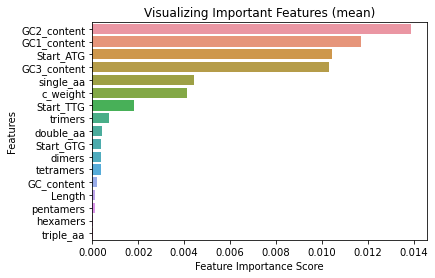

<Figure size 432x288 with 0 Axes>

In [55]:
%matplotlib inline

# Creating a bar plot
sns.barplot(x = features_red, y = features_red.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features (mean)")
#plt.legend(features_red.index, loc ="lower right", fontsize='x-small')
plt.show()

#plt.savefig('feature_imp_g2_agr_mean.png', dpi=300, bbox_inches='tight', transparent=True)

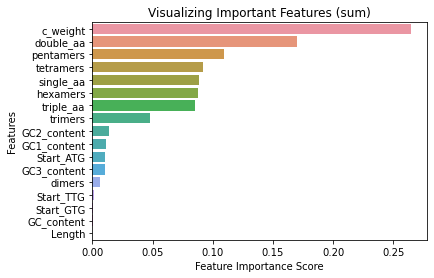

<Figure size 432x288 with 0 Axes>

In [56]:
%matplotlib inline

# Creating a bar plot
sns.barplot(x = features_red2, y = features_red2.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features (sum)")
#plt.legend(features_red.index, loc ="lower right", fontsize='x-small')
plt.show()

#plt.savefig('feature_imp_g2_agr.png', dpi=300, bbox_inches='tight', transparent=True)

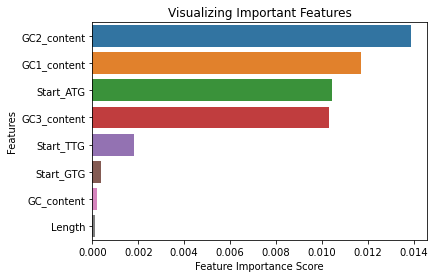

In [57]:
%matplotlib inline

features_condensed = features_condensed.squeeze().sort_values(ascending=False)

# Creating a bar plot
sns.barplot(x = features_condensed, y = features_condensed.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend(features_condensed.index, loc ="lower right", fontsize='small')
plt.show()

### Visualization

In [58]:
feature_imp = pd.Series(clf_rand.feature_importances_, index = feature_names).sort_values(ascending=False)

In [59]:
selected = feature_imp.iloc[0:15]

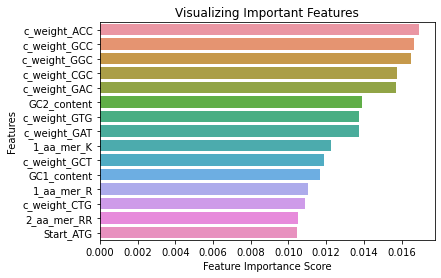

<Figure size 432x288 with 0 Axes>

In [60]:
%matplotlib inline

# Creating a bar plot
sns.barplot(x = selected, y = selected.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()

#plt.savefig('feature_imp_g2.png', dpi=300, bbox_inches='tight', transparent=True)

## Generating the model on selected features

After removing the least important features the accuracy may increase. This is because one removes misleading data and noise, resulting in increased accuracy. A lesser amount of features also reduces the training time.

In [61]:
selected = feature_imp.iloc[0:200]

In [62]:
selected_feat = list(selected.index)

In [63]:
important_indices = [feature_names.index(x) for x in selected_feat]

In [64]:
# Create a Gaussian Classifier
clf_imp = RandomForestClassifier(n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features='auto', 
                             max_depth=20, bootstrap=False, random_state = 42)

# Select most important features
important_indices = [feature_names.index(x) for x in selected_feat]

train_important = train_x[:, important_indices]
test_important = test_x[:, important_indices]

In [65]:
# Train the random forest
clf_imp.fit(train_important, train_y)

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=200,
                       random_state=42)

In [66]:
# Make predictions and determine the error
pred_y = clf_imp.predict(test_important)

# Model Accuracy, how often is the classifier correct?
print("Accuracy score:", metrics.accuracy_score(test_y, pred_y))
# Precision, Recall and Roc_AUC score
print("Precision score:", metrics.precision_score(test_y, pred_y))
print("Recall score:", metrics.recall_score(test_y, pred_y))
print("ROC_AUC score:", metrics.roc_auc_score(test_y, pred_y))

Accuracy score: 0.9956942949407965
Precision score: 0.9936305732484076
Recall score: 0.997867803837953
ROC_AUC score: 0.9956730323537591


#### Confusion matrix

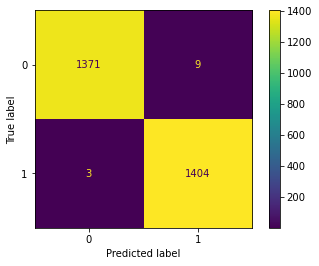

<Figure size 432x288 with 0 Axes>

In [68]:
plot_confusion_matrix(clf_imp, test_important, test_y)  
plt.show()

#plt.savefig('confmatrix_g2_bestmod.png', dpi=300, bbox_inches='tight', transparent=True)

After feature selection based on the most important features the metrics improved by 2%. In the confusion matrix we see that the clf_imp model generates much less false positives and slightly more false negatives. Meaning the accuracy, precision and ROC_AUC scores improve after feature selection and recall decreases slightly. 

## KLADD

## Train model - best params GridSearch

Did not give better results than random search.

In [ ]:
# Create a Gaussian Classifier
clf_grid_imp = RandomForestClassifier(n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=3, 
                             max_depth=40, bootstrap=False, random_state = 42)

important_indices = [feature_names.index(x) for x in selected_feat]

train_important = train_x[:, important_indices]
test_important = test_x[:, important_indices]

In [ ]:
# Train the random forest
clf_grid_imp.fit(train_important, train_y)

In [ ]:
# Make predictions and determine the error
pred_y = clf_grid_imp.predict(test_important)

In [ ]:
# Model Accuracy, how often is the classifier correct?
grid_accuracy = metrics.accuracy_score(test_y, pred_y)

print("Accuracy:", metrics.accuracy_score(test_y, pred_y))

In [ ]:
print('Random search best params with only important features yeilded {:0.3f}%'.format( 100 * (rand_accuracy - grid_accuracy) / grid_accuracy), 
      'better accuracy than grid search best params \nwith important features.')